<a href="https://colab.research.google.com/github/Dishaapatel/ALY-6110/blob/main/Lab_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pyspark

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round as spark_round

spark = SparkSession.builder.appName("BostonHousingLab").getOrCreate()


In [10]:
!ls "/content/drive/MyDrive"


 0f2a729d-9710-4beb-973e-f4b69efe0154.jpg
 1_Disha_Resume.gdoc
 1_Disha_Resume.pdf
 AAPL.gsheet
'Account Sales Data for Analysis.gsheet'
'Account Sales Data for Analysis_Task1.gsheet'
'ALY6040_Final part.gdoc'
'ALY6040_FinalProjectReport_Draft_Group6a_Final_20250510_f (1).gdoc'
 ALY6040_FinalProjectReport_Draft_Group6a_Final_20250510_f.gdoc
'ALY6040_FinalProjectReport_Draft_Group6a_Final (2).gdoc'
 ALY6040_FinalProjectReport_Draft_Group6a_Final.gdoc
 ALY6050_MOD1Project_Patel.gdoc
'ALY6050_MOD3Project_Group_9_Report (1).gdoc'
 ALY6050_MOD3Project_Group_9_Report.gdoc
'ALY6050_MOD 4 Project.gsheet'
'ALY6070 Final Dashboard.gslides'
 ALY6070_MOD3Project_Group_1_Dashboard.gdoc
 ALY6110
'ALY6110_Module 1.gdoc'
 ALY6200_Module_6.gdoc
'ALY_Peer- and Self-Assessment.gsheet'
 AMEX_Comparative_Report_Disha_Patel.gdoc
'Apartment Building Registration Data.gsheet'
 aptitudetest.gsheet
 Assignment_5_AMEX_Disha.gdoc
 audit.gsheet
'Bicycle Shops Data - 4326.gsheet'
 Capstone_EV_Presentation.gslides
'

In [11]:
# Install PySpark if not installed
!pip install pyspark

# Import and create Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("BostonHousingLab").getOrCreate()

print("Spark session created.")


Spark session created.


In [16]:
df = spark.read.csv("/content/drive/MyDrive/ALY6110/BostonHousing.csv",
                    header=True, inferSchema=True)

In [17]:
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [18]:
df.count()


506

In [19]:
print("Number of observations:", df.count())


Number of observations: 506


In [20]:
df.printSchema()


root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [21]:
print("Schema of the dataset:")
df.printSchema()


Schema of the dataset:
root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [22]:
df = df.drop("b")


In [23]:
if "b" in df.columns:
    df = df.drop("b")
    print("Column 'b' dropped.")
else:
    print("Column 'b' not found in dataset.")


Column 'b' not found in dataset.


In [24]:
from pyspark.sql.functions import col, round as spark_round

# Identify numeric columns
numeric_cols = [field.name for field in df.schema.fields
                if "StringType" not in str(field.dataType)]

# Round each numeric column to 2 decimals
for col_name in numeric_cols:
    df = df.withColumn(col_name, spark_round(col(col_name), 2))

df.show(5)


+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
only showing top 5 rows



In [25]:
from pyspark.sql.functions import col, round as spark_round

df = df.withColumn("Age10", spark_round(col("age") * 1.10, 2))
df.show(5)


+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|Age10|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|67.21|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|59.62|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----+
only showing top 5 rows



In [26]:
if "age" in df.columns:
    df = df.withColumn("Age10", spark_round(col("age") * 1.10, 2))
    df.show(5)
else:
    print("Column 'age' not found in the dataset.")


+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|Age10|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|67.21|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7| 2.94|33.4|50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 5.33|36.2|59.62|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----+
only showing top 5 rows



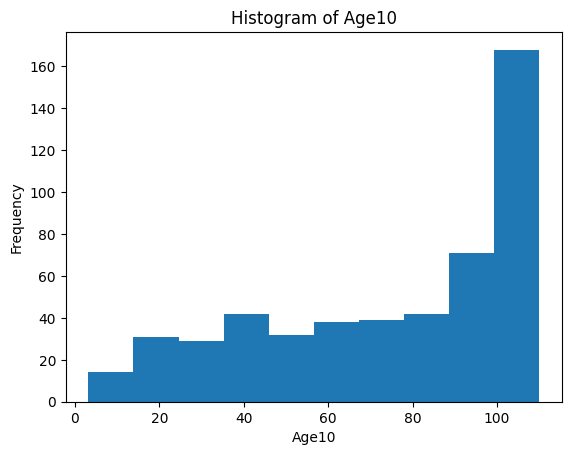

In [27]:
import matplotlib.pyplot as plt

# Convert Age10 column to Pandas
age10_pd = df.select("Age10").toPandas()

# Plot histogram
plt.hist(age10_pd["Age10"])
plt.title("Histogram of Age10")
plt.xlabel("Age10")
plt.ylabel("Frequency")
plt.show()


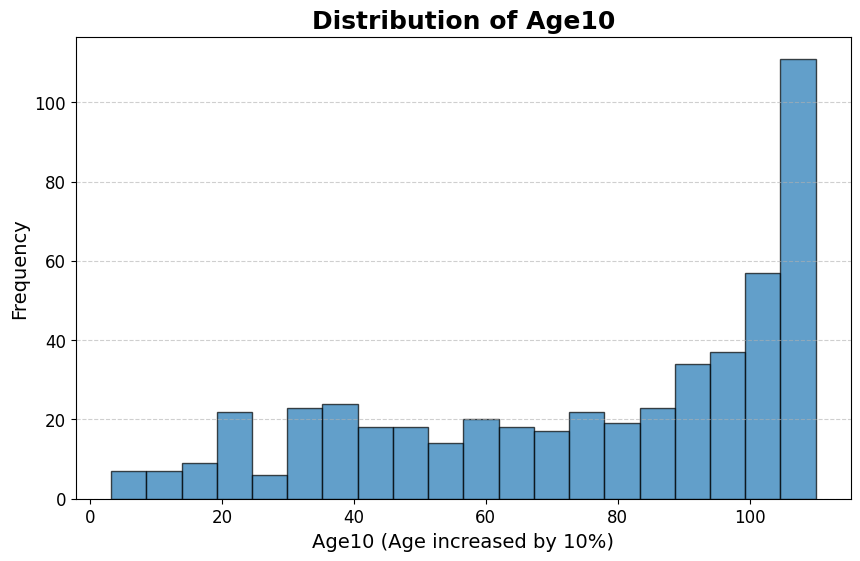

In [28]:
import matplotlib.pyplot as plt

# Convert to Pandas
age10_pd = df.select("Age10").toPandas()

# Styled histogram
plt.figure(figsize=(10, 6))  # Larger plot size
plt.hist(
    age10_pd["Age10"],
    bins=20,            # Number of bars
    edgecolor='black',  # Outline the bars
    alpha=0.7           # Transparency
)

# Titles and labels
plt.title("Distribution of Age10", fontsize=18, fontweight="bold")
plt.xlabel("Age10 (Age increased by 10%)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Style improvements
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [29]:
df.describe().show()


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [30]:
pdf = df.toPandas()


In [31]:
type(pdf)


pandas.core.frame.DataFrame

In [33]:
# Convert Spark DataFrame to Pandas DataFrame
pdf = df.toPandas()

# Show first few rows
pdf.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,4.98,24.0,71.72
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,9.14,21.6,86.79
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,4.03,34.7,67.21
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,2.94,33.4,50.38
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,5.33,36.2,59.62


In [34]:
pdf.tail()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,6.48,22.0,98.23
505,0.05,0.0,11.93,0,0.57,6.03,80.8,2.51,1,273,21.0,7.88,11.9,88.88


In [35]:
pdf.tail(5)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,6.48,22.0,98.23
505,0.05,0.0,11.93,0,0.57,6.03,80.8,2.51,1,273,21.0,7.88,11.9,88.88
